# Biostat M280 Homework 1

#### Due Apr 27 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

0. Apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

0. Create a **private** repository `biostat-m280-2018-spring` and add `Hua-Zhou` and `LuZhangstat` (TA) as your collaborators.

0. Top directories of the repository should be `hw1`, `hw2`, ... Create two branches `master` and `develop`. The `develop` branch will be your main playground, the place where you develop solution (code) to homework problems and write up report. The `master` branch will be your presentation area. Put your homework submission files (IJulia notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in `master` branch.  

0. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

0. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming by John Myles White. Following rules in the style guide will be strictly enforced when grading: (4), (6), (7), (8), (9), (12), (13) and (16).

## Q2

Let's check whether floating-point numbers obey certain algebraic rules.  

0. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

0. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

0. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

0. Is `0 * x == 0` true for all floating-point number `x`?  

0. Is `x / a == x * (1 / a)` always true?

### Answer to Q2(1)

The associative rule for addtion doesn't hold. The following shows an example when x = 0.1, y = 0.1 and z = 1.0. This is because that if a number doesn't have an exact floating-point representation, Julia rounds it to an appropriate representable value. The following shows the bit representation of real numbers and why the associative rule doesn't hold. 

In [1]:
# We can see there is no exact bit representation for 0.1, 
# and the number is rounded to the closest value. This causes 
# 0.1 + 1.0 = 1.2000000000000002
@show bits(0.1)
@show bits(1.0)
@show bits(0.1 + 1.0)
@show bits(0.1 + (0.1 + 1.0))
@show bits((0.1 + 0.1) + 1.0)

bits(0.1) = "0011111110111001100110011001100110011001100110011001100110011010"
bits(1.0) = "0011111111110000000000000000000000000000000000000000000000000000"
bits(0.1 + 1.0) = "0011111111110001100110011001100110011001100110011001100110011010"
bits(0.1 + (0.1 + 1.0)) = "0011111111110011001100110011001100110011001100110011001100110100"
bits((0.1 + 0.1) + 1.0) = "0011111111110011001100110011001100110011001100110011001100110011"


"0011111111110011001100110011001100110011001100110011001100110011"

In [2]:
# Check the associative rule
x, y, z = 0.1, 0.1, 1.0
println(((x + y) + z) == (x + (y + z)))
# Check why the associative rule doesn't apply. 
println((x + y) + z)
println((x + (y + z)))
println((y + z))
println(1.1 + x)

false
1.2
1.2000000000000002
1.1
1.2000000000000002


### Answer to Q2(2)

No. The following shows one case that the associative rule doesn't hold when x = 0.1, y = 0.1 and z = 10.0. This is also due to the rounding inaccuracy of float numbers in IEEE 754 standard. 

In [3]:
# Check the associative rule for multiplication
x = 0.1
y = 0.1
z = 10.0
println((x * y) * z)
println(((x * y) * z) == (x * (y * z)))

0.10000000000000002
false


### Answer to Q2(3)

No. The following shows one example that the distributive rule doesn't hold when x = 1/3, y = 0.1 and a = 10.0. This is also due to the rounding inaccuracy. 

In [4]:
# Check the distributive rule
a = 10.0
x = 1/3
y = 0.1
println((a * (x + y)) == (a * x + a * y))
println((a * x + a * y))
println(a * (x + y))
@show bits(a * (x + y))
@show bits((a * x + a * y))

false
4.333333333333333
4.333333333333334
bits(a * (x + y)) = "0100000000010001010101010101010101010101010101010101010101010110"
bits(a * x + a * y) = "0100000000010001010101010101010101010101010101010101010101010101"


"0100000000010001010101010101010101010101010101010101010101010101"

### Answer to Q2(4)

For the most case, yes. However, if the x is Inf, the result will be NaN. 

In [5]:
x = exp(10000.0)
println(0 * x)
println((0 * x) == 0)

NaN
false


### Answer to Q2(5)
No. The following shows one case that the result is NaN when a = 0.0 and x = 0.0. 

In [20]:
a = 0.0
x = 0.0
println(x / a)
println(x / a == x * (1 / a))

NaN
false


## Q3

Consider Julia function
```julia
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end
```
0. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
2. Compare the bitcode from questions 1 and 2. What do you find?  
3. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does macro `@fastmath` do?

### Answer to Q3(1-3)  

The following shows bitcodes for `g` with `Int64` input and `g` with `Float64` input. We can see the function can be compiled to different bitcodes based on different input types. Bitcodes are much more complicated for the `Float64` input. 

In [11]:
function g(k)
    for i = 1:10
        k = 5 * k - 1
    end
    k
end

g (generic function with 1 method)

In [12]:
# With input type Int64
@code_llvm g(2)
# With input type Float 64
@code_llvm g(2.0)


define i64 @julia_g_64900(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}

define double @julia_g_64905(double) #0 !dbg !5 {
top:
  %1 = fmul double %0, 5.000000e+00
  %2 = fadd double %1, -1.000000e+00
  %3 = fmul double %2, 5.000000e+00
  %4 = fadd double %3, -1.000000e+00
  %5 = fmul double %4, 5.000000e+00
  %6 = fadd double %5, -1.000000e+00
  %7 = fmul double %6, 5.000000e+00
  %8 = fadd double %7, -1.000000e+00
  %9 = fmul double %8, 5.000000e+00
  %10 = fadd double %9, -1.000000e+00
  %11 = fmul double %10, 5.000000e+00
  %12 = fadd double %11, -1.000000e+00
  %13 = fmul double %12, 5.000000e+00
  %14 = fadd double %13, -1.000000e+00
  %15 = fmul double %14, 5.000000e+00
  %16 = fadd double %15, -1.000000e+00
  %17 = fmul double %16, 5.000000e+00
  %18 = fadd double %17, -1.000000e+00
  %19 = fmul double %18, 5.000000e+00
  %20 = fadd double %19, -1.000000e+00
  ret double %20
}


### Answer to Q3(4)
According to the document, The annotation `@fastmath` can re-arrange floating point expressions, e.g. changing the order of evaluation. We can see in the `@fastmath` version, the k = 5k-1 is hoisted out of the loop, which is much faster to evaluate.

In [13]:
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5 * k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

In [14]:
# With input type Int64
@code_llvm g_fastmath(2)
# With input type Float 64
@code_llvm g_fastmath(2.0)


define i64 @julia_g_fastmath_64927(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}

define double @julia_g_fastmath_64928(double) #0 !dbg !5 {
top:
  %1 = fmul fast double %0, 9.765625e+06
  %2 = fadd fast double %1, -2.441406e+06
  ret double %2
}


## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.  
0. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` at points `x`.  

1. Plot the polynomial `y = (x - 1)^7` at points `x`.  

2. Explain what you found.

### Answer to Q4(1-3)
The following graph shows both `y1 = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` and `y2 = (x - 1)^7`. We can see `y1` is not as smoothing as `y2`, and this is because of catastrophic cancellation. The following shows an example:

In [8]:
x = 0.990
test_y1 = x.^7 - 7 * (x.^6) + 21 * (x.^5) - 
          35 * (x.^4) + 35 * (x.^3) - 21 * (x.^2) + 7 * x

0.9999999999999858

From the example, we can see the catastrophic cancellation could happen when we substract two numbers of very different magnitudes. 

In [9]:
using Plots

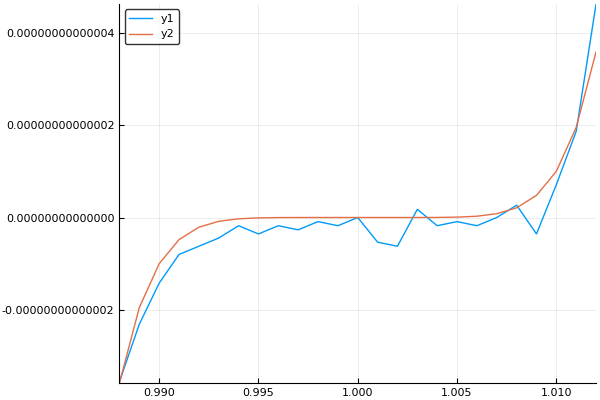

In [15]:
# Create the vector
x = collect(0.988:0.001:1.012)
y1 = x.^7 - 7 * (x.^6) + 21 * (x.^5) - 35 * (x.^4) + 
     35 * (x.^3) - 21 * (x.^2) + 7 * x - 1
y2 = (x - 1).^7
plt = pyplot()
plot(x, [y1, y2])

## Q5

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  
0. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 3 ways, e.g., looping, [comprehension](https://docs.julialang.org/en/stable/manual/arrays/#Comprehensions-1), and vectorization. Compute and print `H` for `n = 5`.   
0. Compare their efficiencies at `n = 1000`.
0. Try different rounding modes (use function `setrounding(Float64, RoundingMode)`) and report the entry `inv(H)[1, 1]` for `n = 15`.

### Answer to Q5(1)   

In [16]:
# Looping
function h(n)
    H = Array{Float64, 2}(n, n)
    for i = 1:n
        for j =1:n
            H[i,j] = 1 / (i + j -1)
        end
    end
    H
end

h (generic function with 1 method)

In [17]:
# Comprehension
function h_comprehension(n)
    H = Array{Float64, 2}(n, n)
    [H[i, j] = 1 / (i + j -1) for j = 1:n for i = 1:n]
    H
end


h_comprehension (generic function with 1 method)

In [18]:
# Vectorization
function h_vectorization(n)
    I = 1 ./ broadcast(+, (collect(0.0:n - 1))', collect(1:n))
    I
end

h_vectorization (generic function with 1 method)

In [19]:
h(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [20]:
h_comprehension(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [21]:
h_vectorization(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

### Answer to Q5(2)
We can see the simple looping function is actually most efficient. The memory usage for all methods are high, because in the function we need to first allocate an 1000 * 1000 array, which takes up most memory. 

In [22]:
using BenchmarkTools

In [26]:
@benchmark h(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     4.087 ms (0.00% GC)
  median time:      4.742 ms (0.00% GC)
  mean time:        5.923 ms (21.34% GC)
  maximum time:     14.115 ms (32.11% GC)
  --------------
  samples:          842
  evals/sample:     1

In [27]:
@benchmark h_comprehension(1000)

BenchmarkTools.Trial: 
  memory estimate:  47.21 MiB
  allocs estimate:  1002028
  --------------
  minimum time:     29.170 ms (20.84% GC)
  median time:      35.807 ms (22.63% GC)
  mean time:        60.488 ms (48.99% GC)
  maximum time:     275.456 ms (77.75% GC)
  --------------
  samples:          83
  evals/sample:     1

In [28]:
@benchmark h_vectorization(1000)

BenchmarkTools.Trial: 
  memory estimate:  15.27 MiB
  allocs estimate:  8
  --------------
  minimum time:     4.213 ms (0.00% GC)
  median time:      7.736 ms (37.19% GC)
  mean time:        7.666 ms (35.52% GC)
  maximum time:     120.146 ms (95.50% GC)
  --------------
  samples:          651
  evals/sample:     1

### Answer to Q5(3)  

From the fllowing, we can see different rounding modes could lead to different results. 

In [30]:
setrounding(Float64, RoundDown) do
    res_round_down = inv(h(15))[1, 1];
    print("round down ")
    println(res_round_down)
end

setrounding(Float64, RoundUp) do
    res_round_up = inv(h(15))[1, 1];
    print("round up ")
    println(res_round_up)
end

setrounding(Float64, RoundNearest) do
    res_round_nearest = inv(h(15))[1, 1];
    print("round nearest ")
    println(res_round_nearest)
end


setrounding(Float64, RoundToZero) do
    res_round_tozero = inv(h(15))[1, 1];
    print("RoundToZero ")
    println(res_round_tozero)
end

round down 153.81321351975203
round up 151.34155625849962
round nearest 158.1023247167468
RoundToZero 150.86081927269697


## Q6

0. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

0. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

0. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

0. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

### Answer to Q6(1)
Show the **Sherman-Morrison formula**  

To prove the equation, we need to prove the right-hand side matrix $Y$ is the inverse of matrix $X$ (left-hand size).   
$
\begin{align*}
\mathbf{X} = \mathbf{A} + \mathbf{u}^{}\mathbf{u}^T, \mathbf{Y} = \mathbf{A}^{-1}-\frac{\mathbf{A}^{-1}\mathbf{u}^{}\mathbf{u}^T\mathbf{A}^{-1}}
        {1+\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u}}
\end{align*}
$




$
\begin{align*}
     \mathbf{X}\mathbf{Y} &= \left(\mathbf{A} + \mathbf{u}\mathbf{u}^T\right)
        \left(\mathbf{A}^{-1}-\frac{\mathbf{A}^{-1}\mathbf{u}^{}\mathbf{u}^T\mathbf{A}^{-1}}
        {1+\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u}}\right)\\
        &= \mathbf{A}^{}\mathbf{A}^{-1} + \mathbf{u}\mathbf{u}^T\mathbf{A}^{-1} - 
        \frac{\mathbf{A}\mathbf{A}^{-1}\mathbf{u}^{} \mathbf{u}^T\mathbf{A}^{-1}}
        {1+\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u}} - \frac{\mathbf{u}^{}\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u}^{}
        \mathbf{u}^T\mathbf{A}^{-1}}{1+\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u}}\\
        &= \mathbf{I} + \mathbf{u}\mathbf{u}^T\mathbf{A}^{-1} - \frac{\mathbf{u}^{} \mathbf{u}^T\mathbf{A}^{-1}+
        \mathbf{u}^{}\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u}^{}\mathbf{u}^T\mathbf{A}^{-1}}
        {1+\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u}} \\
        &= \mathbf{I} + \mathbf{u}\mathbf{u}^T\mathbf{A}^{-1} - \frac{\mathbf{u}
        (1+\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u})\mathbf{u}^T\mathbf{A}^{-1}}
        {1+\mathbf{u}^T\mathbf{A}^{-1}\mathbf{u}}\\
        &= \mathbf{I} + \mathbf{u}\mathbf{u}^T\mathbf{A}^{-1} - \mathbf{u}\mathbf{u}^T\mathbf{A}^{-1} \\
        &= \mathbf{I}
\end{align*}
$

Similarly, we can get $\mathbf{Y}\mathbf{X}$ == $\mathbf{I}$


### Answer to Q6(2)
Show the **Woodbury formula**

Similarly, we define 

$
\begin{align*}
\mathbf{X} = \mathbf{A} + \mathbf{U}^{}\mathbf{V}^T, \mathbf{Y} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}
\end{align*}
$  

In order to show the **Woodbury formula**, we need to prove $\mathbf{X}\mathbf{Y}=\mathbf{I}$ 
and $\mathbf{Y}\mathbf{X}=\mathbf{I}$   

$
\begin{align*}
    \mathbf{X}\mathbf{Y} &= \left(\mathbf{A} + \mathbf{U}^{}\mathbf{V}^T\right)
    \left(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right) \\
    &= \mathbf{A}^{}\mathbf{A}^{-1}-\mathbf{A}^{}\mathbf{A}^{-1}\mathbf{U}
    \left((\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right)
    + \mathbf{U}^{}\mathbf{V}^T\mathbf{A}^{-1} - \mathbf{U}^{}\mathbf{V}^T 
    \mathbf{A}^{-1} \mathbf{U}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} 
    \mathbf{V}^T\mathbf{A}^{-1} \\
    &= \mathbf{I}_{m}-\mathbf{U}(\mathbf{I}_{m}+\mathbf{V}^T\mathbf{A}^{-1}\mathbf{U})^{-1}+
    \mathbf{U}\mathbf{V}^T\mathbf{A}^{-1}-\mathbf{U}^{}\mathbf{V}^T 
    \mathbf{A}^{-1} \mathbf{U}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} 
    \mathbf{V}^T\mathbf{A}^{-1}\\
    &= \mathbf{I}_{m}-\mathbf{U}(\mathbf{I}_{m}+\mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1}
    (\mathbf{I}_{m}+\mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})\mathbf{V}^T\mathbf{A}^{-1}+
    \mathbf{U}\mathbf{V}^T\mathbf{A}^{-1}\\
    &= \mathbf{I}_{m}-\mathbf{U}\mathbf{V}^T\mathbf{A}^{-1}+\mathbf{U}\mathbf{V}^T\mathbf{A}^{-1} \\
    &= \mathbf{I}_{m}
\end{align*} 
$  

Similarly, we can get $\mathbf{Y}\mathbf{X}=\mathbf{I}$, which shows the **Woodbury formula**

### Answer to Q6(3)  

Show the **binomial inversion formula**  


Similarly, we define 

$
\begin{align*}
\mathbf{X} = \mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T, \mathbf{Y} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}
\end{align*}
$  

In order to show the **binomial inversion formula**, we need to prove $\mathbf{X}\mathbf{Y}=\mathbf{I}$ 
and $\mathbf{Y}\mathbf{X}=\mathbf{I}$  

$
\begin{align*}
    \mathbf{X}\mathbf{Y} &= \left(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T\right)
    \left(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + 
    \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right)\\
    &= \mathbf{I}-\mathbf{U}(\mathbf{B}^{-1} + 
    \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} - 
    \mathbf{U}\mathbf{B}\mathbf{V}^T\mathbf{A}^{-1}\mathbf{U}(\mathbf{B}^{-1} + 
    \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1}\mathbf{V}^T\mathbf{A}^{-1} +
    \mathbf{U}\mathbf{B}\mathbf{V}^T\mathbf{A}^{-1} \\
    &= \mathbf{I}-\mathbf{U}\mathbf{B}(\mathbf{B}^{-1} + 
    \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1}(\mathbf{B}^{-1} + 
    \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})\mathbf{V}^T\mathbf{A}^{-1} +
    \mathbf{U}\mathbf{B}\mathbf{V}^T\mathbf{A}^{-1} \\
    &= \mathbf{I}
\end{align*}
$  

Similarly, we can get $\mathbf{Y}\mathbf{X}=\mathbf{I}$, which shows the **binomial inversion formula**

### Answer to Q6(4)  

Show the identity formula.   

Let $\mathbf{M}$ be a matrix comprising the four blocks: $\mathbf{A}$, $\mathbf{U}$, $\mathbf{V}^T$, $\mathbf{I_{m}}$  

$
\begin{align*}
    \text{det}(\mathbf{M}) &= 
\begin{pmatrix}
    \mathbf{A} & \mathbf{-U} \\
    \mathbf{V}^T & \mathbf{I}_{m} 
\end{pmatrix}\text{, According to the block matrix formula, we can have the following} \\ 
&= \text{det}(\mathbf{A})\text{det}(\mathbf{I}_{m}-\mathbf{V}^T\mathbf{A}^{-1}(-\mathbf{U})) \\\\
\mathbf{M} &= 
\begin{pmatrix}
    \mathbf{A} & \mathbf{-U} \\
    \mathbf{V}^T & \mathbf{I}_{m} 
    \end{pmatrix}\text{, According to the block matrix formula, we can have the following} \\ 
    &= \text{det}(\mathbf{I}_{m})\text{det}(\mathbf{A}-(-\mathbf{U})\mathbf{I}_{m}^{-1}\mathbf{V}^T) \\
    &= \text{det}(\mathbf{A}+\mathbf{U}\mathbf{V}^T)
\end{align*}
$

So we can prove $\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})$
